# Setup

In [1]:
!pip install torch==1.6.0 torchvision==0.7.0

# install the latest mmcv-full
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.6.0/index.html

# install mmdetection
!pip install mmdet

# install mmocr
!git clone https://github.com/open-mmlab/mmocr.git

!pip install -r mmocr/requirements.txt
# !pip install -v -e .  # or "python setup.py develop"
!cd mmocr && python setup.py develop

     |████████████████████████████████| 748.8 MB 17 kB/s 
     |████████████████████████████████| 5.9 MB 60.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.6.0/index.html
     |████████████████████████████████| 28.6 MB 89 kB/s 
     |████████████████████████████████| 185 kB 8.5 MB/s 
     |████████████████████████████████| 618 kB 8.5 MB/s 
  Cr

# Clone the required files

In [2]:
!git clone https://github.com/adesgautam/document-kv-data-extractor.git

Cloning into 'document-kv-data-extractor'...
remote: Enumerating objects: 754, done.
remote: Counting objects: 100% (754/754), done.
remote: Compressing objects: 100% (652/652), done.
remote: Total 754 (delta 95), reused 748 (delta 89), pack-reused 0
Receiving objects: 100% (754/754), 109.17 MiB | 30.05 MiB/s, done.
Resolving deltas: 100% (95/95), done.


# Train the SDMGR model (not required, as the model is already trained)

In [8]:
!cd document-kv-data-extractor && python tools/train.py sdmgr_unet16_60e_train.py --work-dir work_dirs/output

2021-07-20 18:58:09,543 - mmocr - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.11 (default, Jul  3 2021, 18:01:19) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.6.0
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v1.5.0 (Git Hash e2ac1fac44c5078ca927cb9b90e1b3066a0b2ed0)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.2
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75
  - CuDNN 7.6.5
  - Magma 2.5.2

## Test the model

In [3]:
!mv document-kv-data-extractor/sdmgr_unet16_60e_test.py mmocr/sdmgr_unet16_60e_test.py
!mv document-kv-data-extractor/mmocr/core/visualize.py mmocr/mmocr/core/visualize.py
!mv document-kv-data-extractor/test_images mmocr/test_images
!mv document-kv-data-extractor/data mmocr/data
!mv document-kv-data-extractor/work_dirs mmocr/work_dirs

In [4]:
!cd mmocr && python tools/kie_test_imgs.py sdmgr_unet16_60e_test.py work_dirs/output/epoch_13.pth --show --show-dir data/output

Use load_from_local loader
[>>] 3/3, 5.8 task/s, elapsed: 1s, ETA:     0s

## View Images with bboxes classified into the defined classes
### The classes are:
##### INVOICE_ISSUER
##### INVOICE_NUM_KEY
##### INVOICE_NUM_VALUE
##### INVOICE_DATE_KEY
##### INVOICE_DATE_VALUE
##### TOTAL_AMOUNT_KEY
##### TOTAL_AMOUNT_VALUE

In [5]:
import matplotlib.pyplot as plt
import glob
import cv2

In [8]:
test_images_path = 'mmocr/data/output/test/*.jpg'
images = glob.glob(test_images_path)
images

['mmocr/data/output/test/000010.jpg',
 'mmocr/data/output/test/000770.jpg',
 'mmocr/data/output/test/000460.jpg']

## The class label is very small to view, so you can go to "temp/data/output/test" dir to view the images with predictions

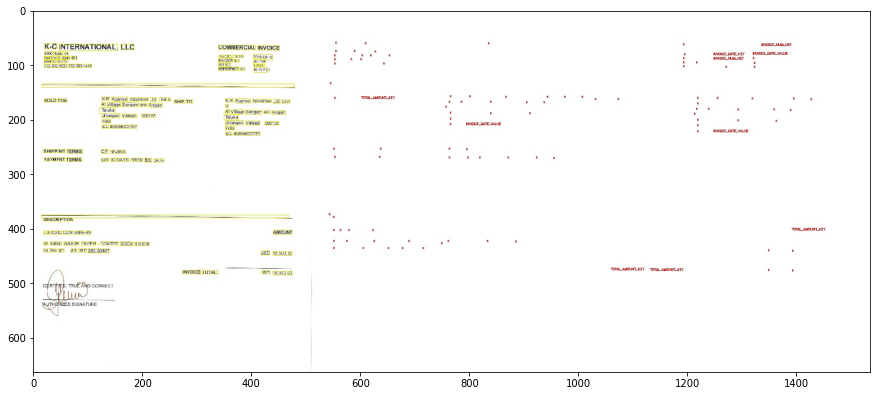

In [9]:
image = cv2.imread(images[0])
plt.figure(figsize=(15,15))
plt.imshow(image)

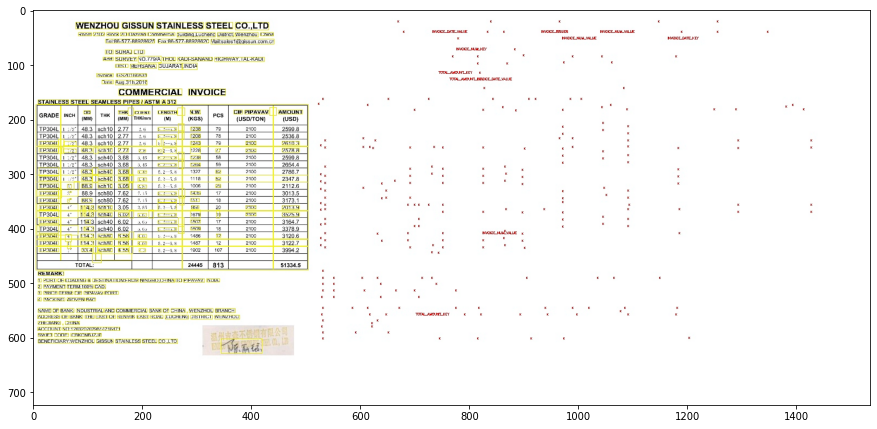

In [10]:
image = cv2.imread(images[1])
plt.figure(figsize=(15,15))
plt.imshow(image)

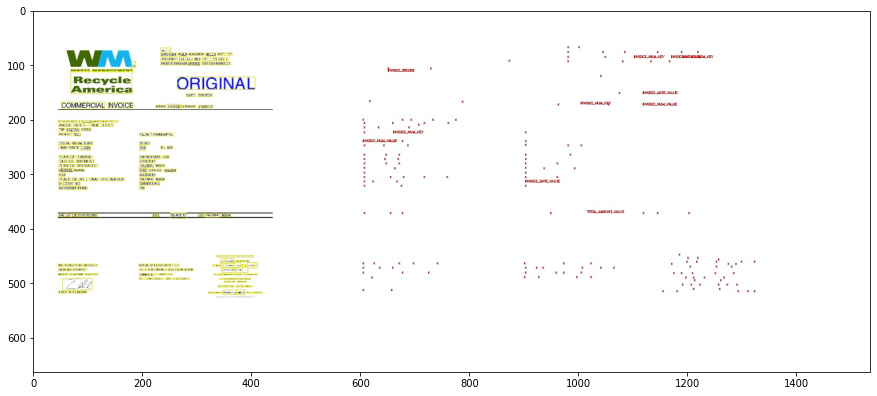

In [11]:
image = cv2.imread(images[2])
plt.figure(figsize=(15,15))
plt.imshow(image)